<div class="alert alert-block alert-success">
    
 
# 🌲 Decision Tree Visualization
    
 👨‍🏫 **Vikesh K**      
 📓 **Lab-08**
  

</div>

 💡  <span style='font-family:Georgia'>
    <font color= darkred> **"However difficult life may seem, there is always something you can do and succeed at.-Stephen Hawking"**
    </font> 💡   

## 📝Lab Agenda

* Plotting of Decision Tree Plots

## Importing modules and data

In [101]:
import pandas as pd
import matplotlib.pyplot as plt


from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [102]:
df = pd.read_csv("https://raw.githubusercontent.com/vkoul/data/main/misc/titanic.csv")

In [81]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Prep

We will focus only on Numerical columns to keep the analysis straightforward

In [82]:
num_cols = df.select_dtypes(["int", "float"]).drop(columns = ['PassengerId']).columns.to_list()

In [83]:
df_num = df[num_cols].copy()

**Filling in the missing value with median age**

In [84]:
df_num.isna().sum()

Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [85]:
median_age = df_num['Age'].median()

In [86]:
df_num['Age'] = df_num['Age'].fillna(median_age)

## Prepare the X and y data

In [87]:
x = df_num.drop(columns = ['Survived'])
y = df_num['Survived']

## Model Fitting

In [88]:
dt = DecisionTreeClassifier(max_depth = 2) # using depth of 2 to plot it properly

In [89]:
dt.fit(x, y)

DecisionTreeClassifier(max_depth=2)

## Plotting the decision tree

* https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html
* https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py

In [90]:
# checking the depth
dt.tree_.max_depth

2

In [103]:
features = list(x.columns) # save the column names as features

**Decision Tree Plotting**

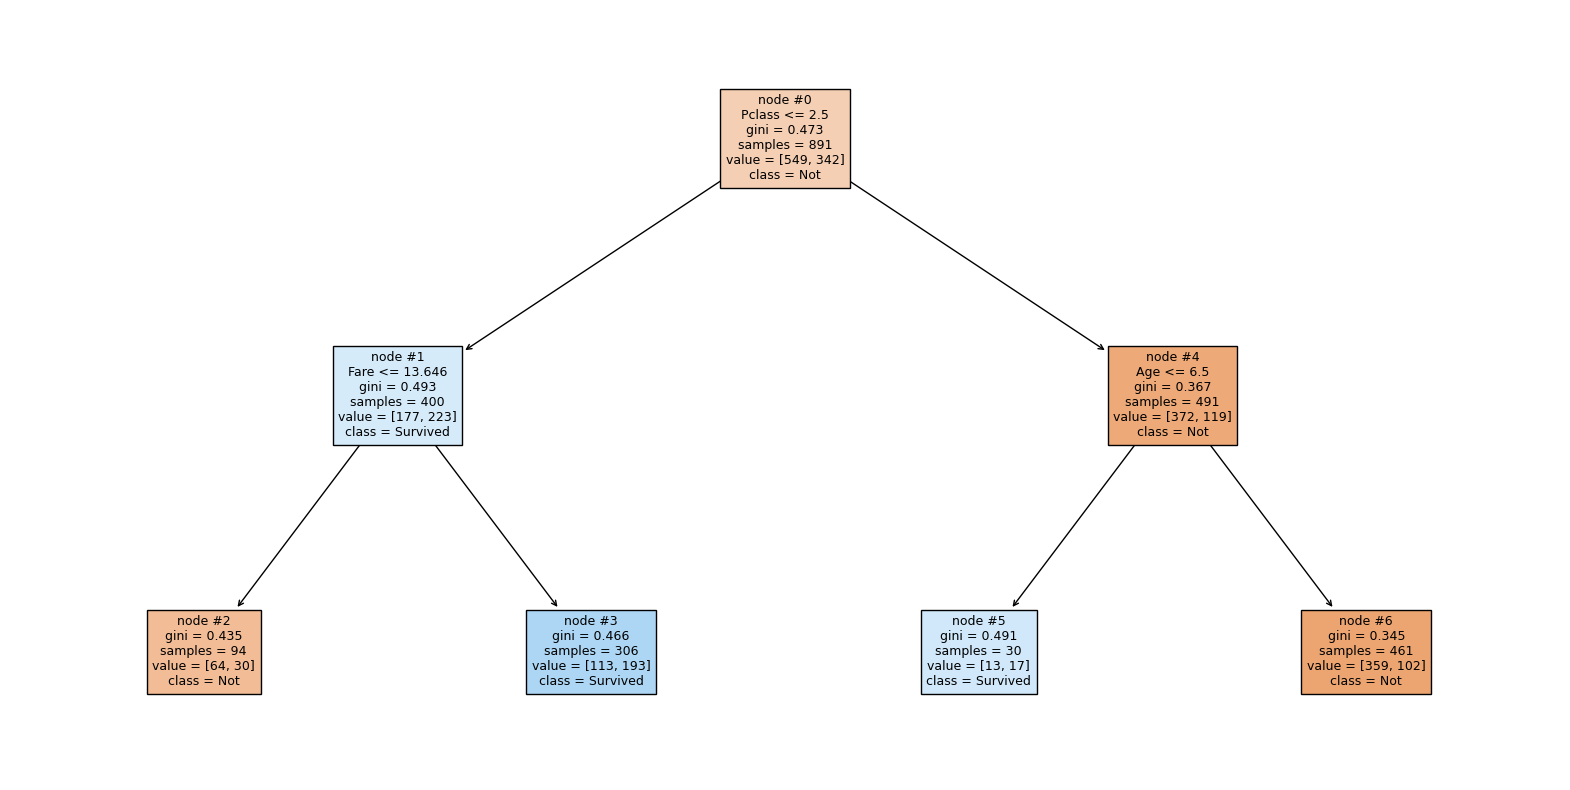

In [104]:
plt.figure(figsize=(20,10))

tree.plot_tree(dt
               , feature_names = features # name of the features
               , max_depth = 5
               , filled= True # for color
               , fontsize= 9
               , node_ids = True # show the node number
               , class_names= ["Not", "Survived"]) # Names of each of the target classes in ascending numerical order.
# show the plot
plt.show()

**The chart is read, top to bottom, from left to right. Hence the Nodes are also ordered in the same manner**

**Verification of the numbers based on the chart**

In [105]:
df_num.query("Pclass <= 2.5").shape[0]

400

In [106]:
df_num.query("Pclass <= 2.5 & Parch <= 0.5").shape[0]

297

In [95]:
# df_num.query("Pclass <= 2.5 & Parch <= 0.5")

In [96]:
df_num.query("Pclass <= 2.5 & Parch > 0.5").shape[0]

103

In [97]:
df_num.query("Parch <= 2.5").shape[0]

876

In [98]:
y.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64